In [3]:
import cv2
import easyocr
import numpy as np

In [4]:
import sys
import os
import matplotlib.pyplot as plt

In [5]:
cv2.__version__

'4.9.0'

In [64]:
detector = cv2.wechat_qrcode_WeChatQRCode(
        "qr_models/detect.prototxt", "qr_models/detect.caffemodel", "qr_models/sr.prototxt", "qr_models/sr.caffemodel")

reader = easyocr.Reader(['en'])


In [88]:
img = cv2.imread('1.bmp')
img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)

In [72]:
qr_res, qr_corners = detector.detectAndDecode(img)

In [73]:
ocr_res = reader.readtext(img)

In [74]:
ocr_res

[([[680, 539], [970, 539], [970, 637], [680, 637]],
  'SK-41D',
  0.9618720745896022),
 ([[1110, 877], [1248, 877], [1248, 930], [1110, 930]],
  '35230753',
  0.9998710693475591),
 ([[1113, 916], [1236, 916], [1236, 965], [1113, 965]],
  '0006470',
  0.9834996236063523),
 ([[511, 1119], [647, 1119], [647, 1185], [511, 1185]],
  'GLB',
  0.9999657937972207),
 ([[573, 1147], [1159, 1147], [1159, 1256], [573, 1256]],
  'IMEI 352307530006470',
  0.8890090635641452)]

In [75]:
imei_result

[([[290, 594], [350, 594], [350, 626], [290, 626]], 'IMEI')]

In [77]:
imei_result = [(i[0], i[1]) for i in ocr_res if 'IMEI' in i[1]]

In [78]:
for i in range(len(qr_res)):
    content = qr_res[i]
    corners = qr_corners[i].astype(np.int32)

    break

In [79]:
res_text_position = [img.shape[0] // 2 - 40, img.shape[1] // 2]
res_text_position

[1496, 1024]

In [80]:
corners.astype(np.int32)

array([[1117,  770],
       [1225,  766],
       [1230,  869],
       [1123,  877]], dtype=int32)

In [81]:
corners.reshape((-1, 1, 2))


array([[[1117,  770]],

       [[1225,  766]],

       [[1230,  869]],

       [[1123,  877]]], dtype=int32)

In [89]:
# qr result
img = cv2.polylines(img, corners.reshape((-1, 1, 2)), isClosed=True, color=(255, 0, 0), thickness=20)
text_position = (int(corners[0][0] - 100), int(corners[0][1]) - 10)  # Adjust text position above the box
img =  cv2.putText(img, content, text_position, cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 2)

# imei result
imei_corners = np.asarray(imei_result[0][0])
img = cv2.polylines(img, imei_corners.reshape((-1, 1, 2)), isClosed=True, color=(255, 0, 0), thickness=20)
text_position = (int(imei_corners[0][0] - 100), int(imei_corners[0][1]) - 10)  # Adjust text position above the box
img =  cv2.putText(img, imei_result[0][1], text_position, cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 2)

imei_text = imei_result[0][1][4:].strip()

if imei_text == content:
    img =  cv2.putText(img, 'PASS', res_text_position, cv2.FONT_HERSHEY_SIMPLEX, 6, (0, 255, 0), 10)
else:
    img =  cv2.putText(img, 'NG', res_text_position, cv2.FONT_HERSHEY_SIMPLEX, 6, (0, 255, 0), 10)


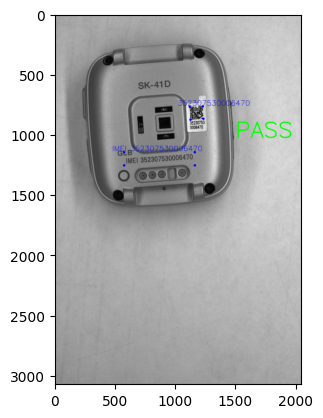

In [90]:
plt.imshow(img[:,:, ::-1])

('352307530006447',)


array([[[196, 171, 129],
        [196, 171, 129],
        [196, 171, 129],
        ...,
        [205, 180, 138],
        [206, 181, 139],
        [203, 177, 140]],

       [[196, 171, 129],
        [196, 171, 129],
        [196, 171, 129],
        ...,
        [206, 180, 140],
        [207, 181, 144],
        [203, 179, 143]],

       [[196, 171, 129],
        [196, 171, 129],
        [196, 171, 129],
        ...,
        [204, 181, 143],
        [204, 182, 147],
        [201, 180, 149]],

       ...,

       [[ 75,  91, 128],
        [ 75,  91, 128],
        [ 75,  91, 127],
        ...,
        [ 46,  55,  82],
        [ 49,  58,  85],
        [ 51,  60,  87]],

       [[ 76,  92, 129],
        [ 76,  92, 129],
        [ 76,  92, 128],
        ...,
        [ 44,  55,  82],
        [ 45,  56,  83],
        [ 47,  58,  85]],

       [[ 76,  92, 129],
        [ 76,  92, 129],
        [ 77,  93, 129],
        ...,
        [ 44,  55,  82],
        [ 44,  55,  82],
        [ 45,  56,  83]]